# Superposition and Entanglement in Qiskit
This notebook demonstrates:
1. **Superposition** using a single qubit.
2. **Entanglement** using two qubits.
We will use Qiskit to create circuits, visualize the states, and measure outcomes.

In [1]:
# ===========================
# Install Qiskit, Aer and pylatexenc
# ===========================
!pip install qiskit --quiet
!pip install qiskit-aer --quiet



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 64.2 MB/s eta 0:00:00


In [2]:
# ===========================
# Import Libraries
# ===========================
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt


## 1. Superposition Example

In [9]:
# ===========================
# Superposition Example
# ===========================
                                 #----------Task 1---------
# Create 1-qubit circuit
qc_super = QuantumCircuit(1)

# Apply Hadamard gate to create superposition
qc_super.h(0)

# Draw the circuit
qc_super.draw('text')

# Get statevector and visualize on Bloch sphere
state_super = Statevector.from_instruction(qc_super)
plot_bloch_multivector(state_super)
plt.show()

# Measure and simulate
qc_super.measure_all()
simulator = AerSimulator()
job_super = simulator.run(qc_super, shots=1024)
result_super = job_super.result()
counts_super = result_super.get_counts()
print("Superposition Measurement Counts:", counts_super)

# Plot the histogram of measurement results
plot_histogram(counts_super)
plt.show()

Superposition Measurement Counts: {'1': 531, '0': 493}


## 2. Entanglement Example

Entangled Statevector: Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


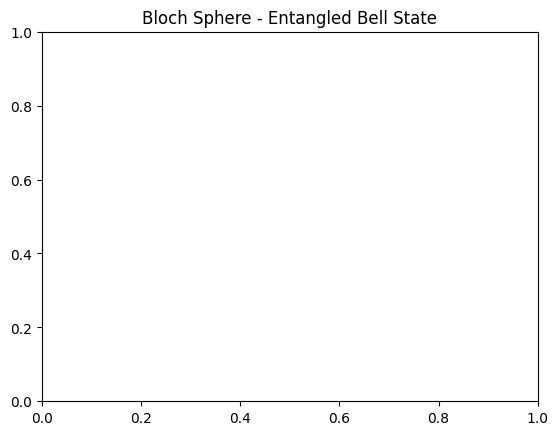

Entanglement Measurement Counts: {'00': 507, '11': 517}


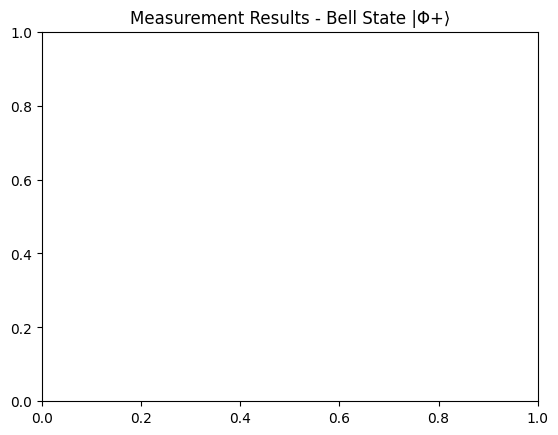

In [8]:
# ===========================
# Entanglement Example
# ===========================
                                            #Task2---------
# Create 2-qubit circuit
qc_ent= QuantumCircuit(2)

# Step1:Apply Hadamard on qubit 0
qc_ent.h(0)

# Step2:Apply CNOT to entangle qubit 0 and 1
qc_ent.cx(0, 1)

# Draw the circuit
qc_ent.draw('text')

# Step3:Get statevector(should be entangled)
state_ent = Statevector.from_instruction(qc_ent)
print("Entangled Statevector:", state_ent)
# Visualize state on Bloch sphere
plot_bloch_multivector(state_ent)
plt.title("Bloch Sphere - Entangled Bell State")
plt.show()

#Step4: Measure and simulate
qc_ent.measure_all()
job_ent = simulator.run(qc_ent, shots=1024)
result_ent = job_ent.result()
counts_ent = result_ent.get_counts()
print("Entanglement Measurement Counts:", counts_ent)

# Step 5: Plot histogram
plot_histogram(counts_ent)
plt.title("Measurement Results - Bell State |Φ+⟩")
plt.show()